In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'

In [6]:
exam = pd.read_excel('../assets/excel_exam.xlsx')
print('avg:', sum(exam['math']) / len(exam['math']))
print((exam[['math', 'english', 'science']] >= 50).sum())

avg: 57.45
math       13
english    20
science    14
dtype: int64


In [14]:
# exam.head(1)
# exam.tail(1)
# exam.shape
# exam.info()
exam.describe()

,id,nclass,math,english,science
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,3.000000,57.450000,84.900000,59.450000
std,5.91608,1.450953,20.299015,12.875517,25.292968
min,1.00000,1.000000,20.000000,56.000000,12.000000
25%,5.75000,2.000000,45.750000,78.000000,45.000000
50%,10.50000,3.000000,54.000000,86.500000,62.500000
75%,15.25000,4.000000,75.750000,98.000000,78.000000
max,20.00000,5.000000,90.000000,98.000000,98.000000


In [16]:
mpg = pd.read_csv('../assets/mpg.csv')

In [23]:
# mpg.head(1)
# mpg.tail(1)
# mpg.shape
# mpg.info()
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [25]:
mpg_copy = mpg.copy()
mpg_copy.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [34]:
mpg_copy.rename(columns={
  'cty': '도심연비',
  'hwy': '고속도로연비',
  'manufacturer': '제조사',
  'fl': '연료'
}, inplace = True)

In [35]:
mpg_copy

,제조사,model,displ,year,cyl,trans,drv,도심연비,고속도로연비,연료,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [43]:
mpg_copy['평균연비'] = (mpg_copy['도심연비'] + mpg_copy['고속도로연비']) / 2
mpg_copy['연비상태'] = np.where(mpg_copy['평균연비'] >= 25, '좋음', np.where(mpg_copy['평균연비'] >= 20, '보통', '나쁨'))

In [46]:
mpg_copy['연비상태'].value_counts()

연비상태
나쁨    106
보통     85
좋음     43
Name: count, dtype: int64

<Axes: xlabel='연비상태', ylabel='count'>

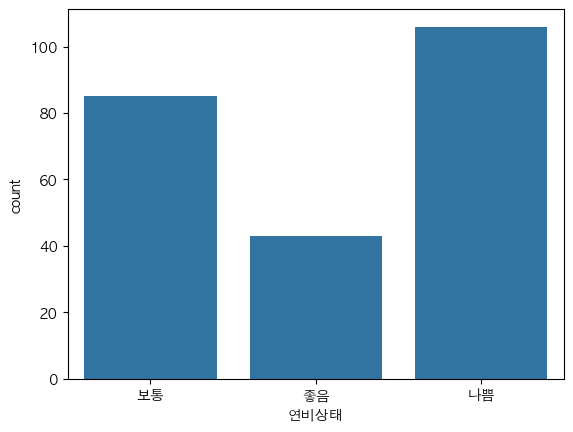

In [48]:
sns.countplot(data = mpg_copy, x = '연비상태')

In [ ]:
mpg_copy['등급'] = np.where(mpg_copy['평균연비'] >= 30, 'A',
                  np.where(mpg_copy['평균연비'] >=  20, 'B', 'C'))

<Axes: xlabel='등급', ylabel='count'>

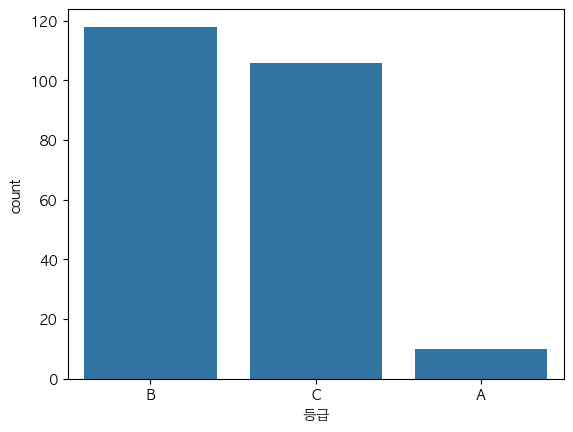

In [53]:
sns.countplot(data = mpg_copy, x = '등급')

In [54]:
mpg_copy['등급2'] = np.where(mpg_copy['평균연비'] >= 30, 'A',
                   np.where(mpg_copy['평균연비'] >= 25, 'B',
                   np.where(mpg_copy['평균연비'] >= 20, 'C',
                   np.where(mpg_copy['평균연비'] >= 15, 'D', 'E'))))

<Axes: xlabel='등급2', ylabel='count'>

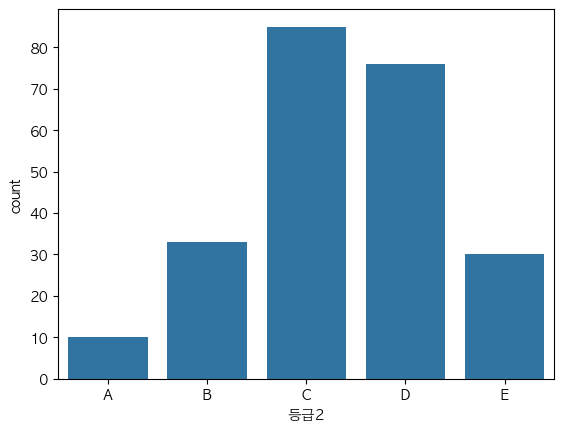

In [57]:
sns.countplot(data = mpg_copy, x = '등급2', order = sorted(mpg_copy['등급2'].unique()))

<Axes: xlabel='등급2'>

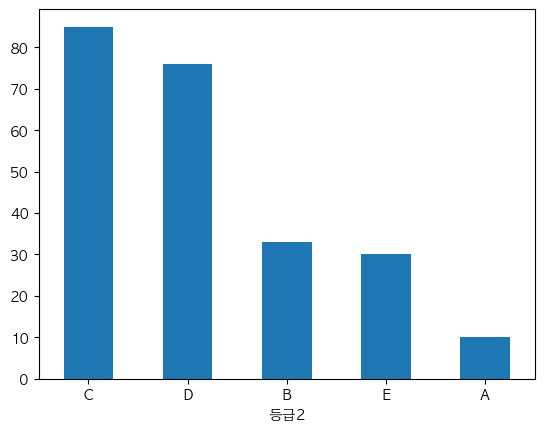

In [63]:
result = mpg_copy['등급2'].value_counts()
result.plot.bar(rot = 0)

In [66]:
mpg_copy['category'].unique()
# small - 'compact', 'subcompact', '2seater'
# large - 'midsize', 'minivan', 'suv', 'pickup'
mpg_copy['type'] = np.where(mpg_copy['category'].isin(['compact', 'subcompact', '2seater']), 'small', 'large')

<Axes: xlabel='type'>

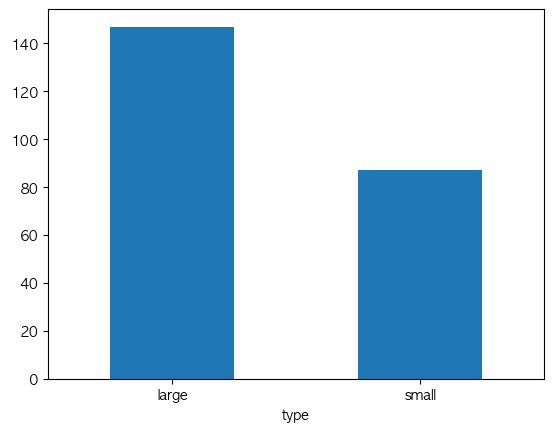

In [67]:
mpg_copy['type'].value_counts().plot.bar(rot = 0)

In [68]:
mpg_copy['land'] = np.where(mpg_copy['제조사'].isin(['hyundai', 'honda']), 'asia', 'non-asia') 

<Axes: xlabel='land'>

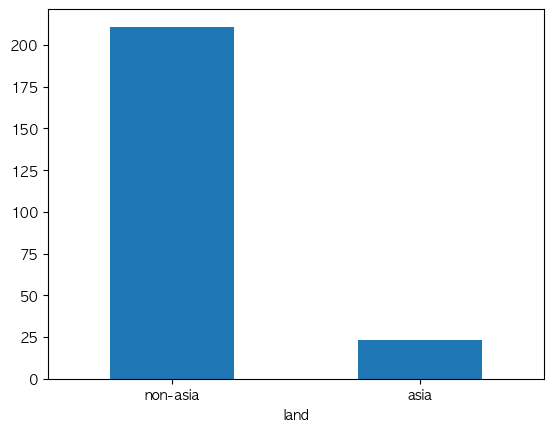

In [69]:
mpg_copy['land'].value_counts().plot.bar(rot = 0)

In [79]:
mw = pd.read_csv('../assets/midwest.csv')
mw.rename(columns={'poptotal': 'total', 'popasian': 'asian'}, inplace = True)

In [80]:
mw['asianPercent'] = (mw['asian'] / mw['total']) * 100
mw.sort_values('asianPercent', ascending = False).head(10)

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,asianPercent
21,582,DU PAGE,IL,0.020,781666,39083.30000,714905,15462,962,39634,...,11.963266,771641,98.717483,2.714734,2.945252,2.399064,3.838249,1,HLU,5.070452
9,570,CHAMPAIGN,IL,0.058,173025,2983.18966,146506,16559,331,8033,...,17.757448,154934,89.544286,15.572437,14.132234,17.562728,8.105017,1,HAU,4.642682
274,1277,WASHTENAW,MI,0.041,282937,6900.90244,236390,31720,1076,11724,...,20.791321,261261,92.338931,12.162933,10.797816,13.455456,7.174777,1,HAU,4.143679
15,576,COOK,IL,0.058,5105067,88018.39660,3204947,1317147,10289,188565,...,8.329964,5023523,98.402685,14.198303,22.293497,11.665542,10.825269,1,AAU,3.693683
180,741,TIPPECANOE,IN,0.030,130598,4353.26667,122013,2660,320,4821,...,15.257130,114062,87.338244,14.381652,10.567515,17.188413,7.864945,1,HAU,3.691481
38,599,JACKSON,IL,0.036,61067,1696.30556,51991,6342,109,2178,...,14.089892,54230,88.804100,28.371750,26.392211,32.458483,13.815301,0,AHR,3.566574
396,3012,LA CROSSE,WI,0.028,97904,3496.57143,94319,438,340,2667,...,7.344758,93254,95.250449,13.408540,14.452894,14.057538,9.528131,1,HAU,2.724097
226,1229,INGHAM,MI,0.034,281912,8291.52941,237183,27837,1941,7562,...,12.859983,261491,92.756250,16.618163,18.947244,17.066058,9.398272,1,HAU,2.682397
382,2998,EAU CLAIRE,WI,0.038,85183,2241.65789,82202,238,467,2124,...,7.556348,80458,94.453119,15.943722,18.743018,16.768501,8.575147,1,HAU,2.493455
154,715,MONROE,IN,0.024,108978,4540.75000,102752,2835,216,2713,...,17.201227,93693,85.974233,19.439019,14.346337,22.998998,9.575163,1,HHU,2.489493


In [ ]:
mw['asianPercent'].describe()

count    437.000000
mean       0.487246
std        0.627856
min        0.000000
25%        0.173739
50%        0.297170
75%        0.521161
max        5.070452
Name: asianPercent, dtype: float64

<Axes: xlabel='asiangroup'>

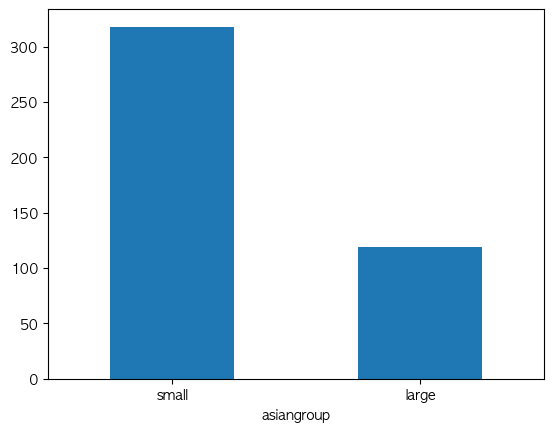

In [77]:
mw['asiangroup'] = np.where(mw['asianPercent'] >= np.average(mw['asianPercent']), 'large', 'small')
mw['asiangroup'].value_counts().plot.bar(rot = 0)